In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('droppednulls.xlsx')

In [2]:
reading = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05'] 
literary_purpose = ['ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05']
informational_purpose=['ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05']
interpreting_process= ['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05']
straightforward_process = ['ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [3]:
# Define the function
def calculate_average(df, columns, new_column_name):
    """
    Calculates the mean of the specified columns and adds a new column with the result.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of column names to calculate the mean.
    new_column_name (str): The name of the new column to store the averages.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column added.
    """
    df[new_column_name] = df[columns].mean(axis=1)
    return df

# Calculate the mean of the reading columns
df = calculate_average(df, reading, 'reading_avg')
df = calculate_average(df, literary_purpose, 'literary_purpose_avg')
df = calculate_average(df, informational_purpose, 'informational_purpose_avg')
df = calculate_average(df, interpreting_process, 'interpreting_process_avg')
df = calculate_average(df, straightforward_process, 'straightforward_process_avg')

In [4]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg',
       'interpreting_process_avg', 'straightforward_process_avg']

In [5]:

            
pivot_df_avgliteracy = df.pivot_table(values=averages, index=['Country','ASBH02A'], aggfunc='mean')
pivot_df_avgliteracy

informational_purpose_avg  interpreting_process_avg  \
Country     ASBH02A                                                        
Austria     No                      498.657408                497.365857   
            Yes                     533.604588                533.534905   
Egypt       No                      368.944815                376.185753   
            Yes                     385.238053                382.455807   
France      No                      491.164422                492.907004   
            Yes                     520.421201                518.050071   
Germany     No                      493.821976                491.637327   
            Yes                     543.667811                543.658520   
Iran        No                      415.629239                418.139679   
            Yes                     421.840284                420.598873   
Jordan      No                      384.671082                377.712246   
            Yes                     371.996404                366.931226   
Netherlands No                      534.779113                527.015559   
            Yes                     546.509569                545.771857   
Sweden      No                      513.800935                509.636203   
            Yes                     564.668847                563.305228   
Turkey      No                      459.545292                450.463128   
            Yes                     508.299876                504.960550   

                     literary_purpose_avg  reading_avg  \
Country     ASBH02A                                      
Austria     No                 503.520940   501.137730   
            Yes                538.353546   535.753998   
Egypt       No                 370.055159   368.778085   
            Yes                374.382017   381.017793   
France      No                 494.816631   495.189771   
            Yes                524.127303   522.368422   
Germany     No                 503.782080   496.504230   
            Yes                551.219226   545.941246   
Iran        No                 435.488964   424.286114   
            Yes                422.984017   422.865906   
Jordan      No                 381.794478   383.291099   
            Yes                365.809400   368.777434   
Netherlands No                 527.257465   532.012580   
            Yes                544.596141   544.055471   
Sweden      No                 510.426070   513.532231   
            Yes                569.014791   565.399209   
Turkey      No                 456.161154   454.834990   
            Yes                505.637007   507.160195   

                     straightforward_process_avg  
Country     ASBH02A                               
Austria     No                        503.331516  
            Yes                       538.541325  
Egypt       No                        364.934062  
            Yes                       378.604022  
France      No                        495.147998  
            Yes                       527.467670  
Germany     No                        496.581183  
            Yes                       546.973033  
Iran        No                        429.671741  
            Yes                       423.450890  
Jordan      No                        384.778212  
            Yes                       368.988134  
Netherlands No                        527.323949  
            Yes                       544.427139  
Sweden      No                        515.623797  
            Yes                       568.000974  
Turkey      No                        459.409544  
            Yes                       509.904656

In [6]:
columns_to_select = ['Country', 'ASBH02A'] + averages

# Select the combined columns from the DataFrame
df_selected = df[columns_to_select]
df_selected.tail()

,Country,ASBH02A,reading_avg,literary_purpose_avg,informational_purpose_avg,interpreting_process_avg,straightforward_process_avg
41360,Sweden,Yes,559.232580,559.735468,554.591180,542.704898,589.780206
41361,Sweden,Yes,593.295880,601.534968,611.440826,593.369508,608.667630
41362,Sweden,Yes,595.319232,604.506382,576.929524,588.271718,614.089446
41363,Sweden,Yes,517.586000,519.712354,534.394136,505.015210,514.398558
41364,Sweden,Yes,426.210106,435.543908,426.645592,438.858794,419.138954


In [7]:
# Reshape the DataFrame to long format
df_melted = pd.melt(df_selected, id_vars=['Country','ASBH02A'], value_vars=averages, var_name='variable', value_name='value')

# Display the reshaped DataFrame
print(df_melted.tail())

       Country ASBH02A                     variable       value
206820  Sweden     Yes  straightforward_process_avg  589.780206
206821  Sweden     Yes  straightforward_process_avg  608.667630
206822  Sweden     Yes  straightforward_process_avg  614.089446
206823  Sweden     Yes  straightforward_process_avg  514.398558
206824  Sweden     Yes  straightforward_process_avg  419.138954


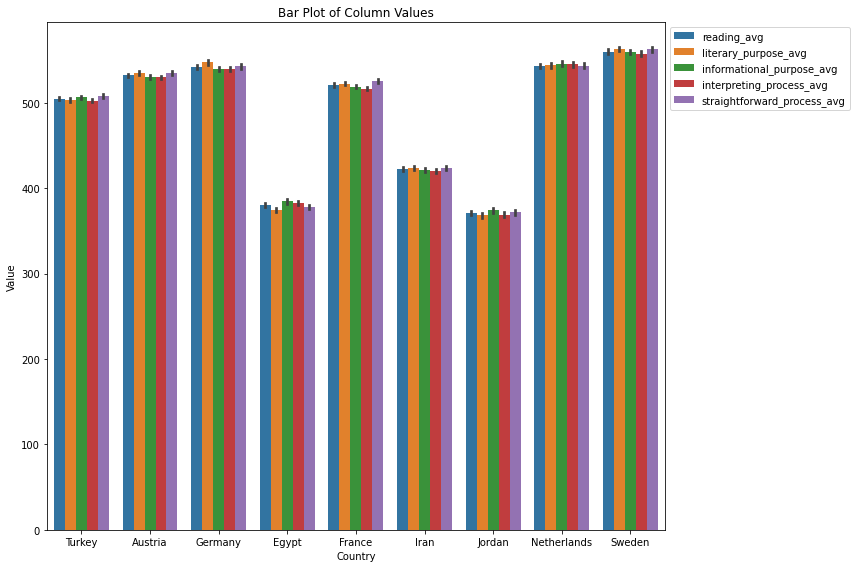

In [8]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='Country', y='value', hue='variable', data=df_melted)

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Bar Plot of Column Values')

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
df_melted_grouped = df_melted.groupby(['Country','ASBH02A'])
df_melted_grouped.head()

,Country,ASBH02A,variable,value
0,Turkey,Yes,reading_avg,567.155494
1,Turkey,Yes,reading_avg,568.443750
2,Turkey,Yes,reading_avg,554.652992
3,Turkey,Yes,reading_avg,579.925512
4,Turkey,Yes,reading_avg,572.674690
128,Turkey,No,reading_avg,561.695880
162,Turkey,No,reading_avg,555.171096
171,Turkey,No,reading_avg,420.033494
178,Turkey,No,reading_avg,346.815226
179,Turkey,No,reading_avg,459.121280


In [15]:
# Create the pivot table with 'Country' and 'ASBH02A' as index columns
pivot_table = pd.pivot_table(df_melted, index=['Country', 'ASBH02A'], columns='variable', values='value')

# Reset index to make 'Country' and 'ASBH02A' as columns again
pivot_table.reset_index(inplace=True)

# Display the pivot table
print(pivot_table)

variable      Country ASBH02A  informational_purpose_avg  \
0             Austria      No                 498.657408   
1             Austria     Yes                 533.604588   
2               Egypt      No                 368.944815   
3               Egypt     Yes                 385.238053   
4              France      No                 491.164422   
5              France     Yes                 520.421201   
6             Germany      No                 493.821976   
7             Germany     Yes                 543.667811   
8                Iran      No                 415.629239   
9                Iran     Yes                 421.840284   
10             Jordan      No                 384.671082   
11             Jordan     Yes                 371.996404   
12        Netherlands      No                 534.779113   
13        Netherlands     Yes                 546.509569   
14             Sweden      No                 513.800935   
15             Sweden     Yes           

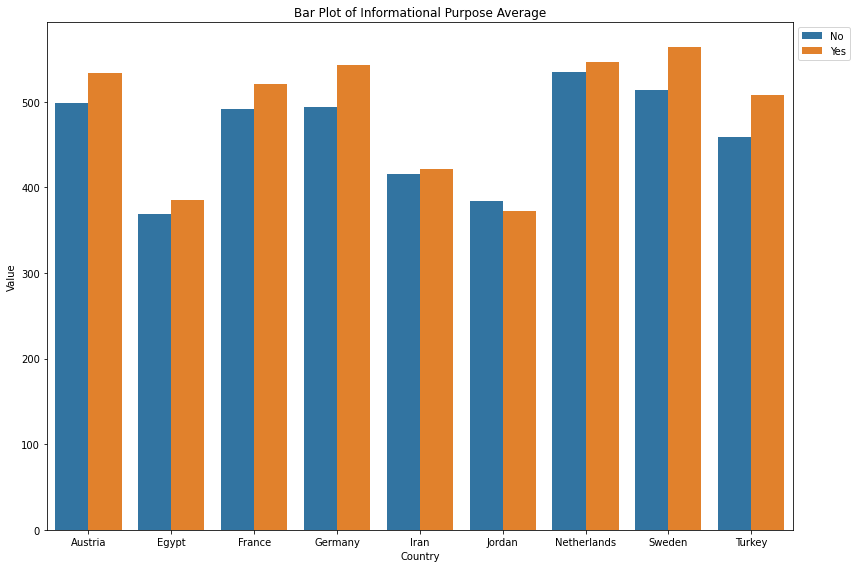

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='Country', y='informational_purpose_avg', hue='ASBH02A', data=pivot_table)

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Bar Plot of Informational Purpose Average')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
pivot_df_avgliteracy.reset_index(inplace=True)

# Reshape the data for plotting
melted_df = pivot_df_avgliteracy.melt(id_vars=['Country', 'ASBH02A'], value_vars=averages, var_name='Literacy_Element', value_name='Average')

# Create a combined column for Country and Literacy Element
melted_df['Country_Literacy'] = melted_df['Country'] + '_' + melted_df['Literacy_Element']

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(data=melted_df, x='Country_Literacy', y='Average', hue='ASBH02A', palette='pastel', ci=None)
plt.title('Average Literacy Scores by Country and Literacy Element')
plt.ylabel('Average Score')
plt.xlabel('Country and Literacy Element')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.legend(title='ASBH02A', loc='upper right')
plt.show()

In [ ]:
ax7 = pivot_df_avgliteracy.plot(kind='bar', figsize=(15,10), width=0.8)
plt.title('avg lit Scores by Country and ASBH02A')
plt.xlabel('Country')
plt.ylabel('Mean Score')
plt.legend(title='ASBH02A')
# Move the legend outside the plot
ax7.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()

---------------------------------------

## Unstacked pivot below

In [ ]:
pivot_df_avgliteracy_unstacked = pivot_df_avgliteracy.unstack(level=1)
ax5 = pivot_df_avgliteracy_unstacked.plot(kind='bar', figsize=(15,10), width=0.8)
plt.title('avg lit Scores by Country and ASBH02A')
plt.xlabel('Country')
plt.ylabel('Mean Score')
plt.legend(title='ASBH02A')
# Move the legend outside the plot
ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()

In [ ]:
pivot_df_avgliteracy_unstacked = pivot_df_avgliteracy.unstack(level=1)
ax6 = pivot_df_avgliteracy_unstacked.plot(kind='bar', figsize=(15,10), width=0.8, stacked = True)
plt.title('avg lit Scores by Country and ASBH02A')
plt.xlabel('Country')
plt.ylabel('Mean Score')
plt.legend(title='ASBH02A')
# Move the legend outside the plot
ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()